# Project 1 - Diabetes and Possible Contributing Factors

This jupyter notebook contains the cleaning, analysis, and visualizations of the diabetes_prediction_dataset on kaggle. 

## Contents

- **Importing and Cleaning the Data**
    - Importing the csv
    - Replacing 1/0 Values with True/False Values
    - Cleaning the smoking_history column
    - Dropping n/a values and checking value counts
    - Viewing the clean dataset

- **Analysis**
    - Summary Table 1 - Age, BMI, HbA1c Level, and Blood Glucose Level Among Diabetics and Non-Diabetics
    - Summary Table 2 - Diabetics with Hypertension, Heart Diease, Both, or Neither
    - Summary Table 3 - Diabetics that are at least 45 Years Old, 25+ BMI, Both, or Neither

- **Visualizations**
    

## Importing and Cleaning the Data

The first step is to import the dataframe from the csv, and save it to a new variable. Some of the columns in this dateset have 0 and 1 values, so these will be replace with True/False values.

In [1]:
import pandas as pd

df = pd.read_csv("Resources/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


The hypertension, heart_disease, and diabetes columns all have ones and zeros, indicating the presence or absence of these conditions. To make these columns easier to understand, the values will to changed to True/False, where True indicates the presence of a condition, and False indicates a lack of that condition.

In [2]:
# creating a new variable for the clean dataframe
clean_df = df

# converting hypertension, heart_disease, and diabetes columns to boolean values
# people either have them, or they don't
clean_df["hypertension"] = clean_df["hypertension"].replace({0: False, 1: True})
clean_df["heart_disease"] = clean_df["heart_disease"].replace({0: False, 1: True})
clean_df["diabetes"] = clean_df["diabetes"].replace({0: False, 1: True})

clean_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,False,True,never,25.19,6.6,140,False
1,Female,54.0,False,False,No Info,27.32,6.6,80,False
2,Male,28.0,False,False,never,27.32,5.7,158,False
3,Female,36.0,False,False,current,23.45,5.0,155,False
4,Male,76.0,True,True,current,20.14,4.8,155,False
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,False,False,No Info,27.32,6.2,90,False
99996,Female,2.0,False,False,No Info,17.37,6.5,100,False
99997,Male,66.0,False,False,former,27.83,5.7,155,False
99998,Female,24.0,False,False,never,35.42,4.0,100,False


The relevant columns are now set to boolean values. It's time to take a closer look at the values for each column.

Let's look at the value counts for the smoking_history column.

In [3]:
clean_df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In this column, some patients have been labeled as "ever". While this could be seen as a mistyping of "never", this cannot be confirmed. Because these rows are less than 5% of the dataset, they will be removed.

In [4]:
# removing rows where smoking history is "ever"
clean_df = clean_df[clean_df["smoking_history"] != "ever"]

We initially looked to see if the "no info" category needed to be removed. However, we decided not to do this, as that category makes up for approximately 30% of the data.

It is odd that 15 patients under the age of 5 are currently smoking, and that 61 patients under 5 have smoked in the past. Because this cannot be verified, we decided to limit the scope of our study to adults 21 and older. This will allow us to better determine the contributing factors to diabetes.

In [5]:
# limiting the scope of the study to adults over 21
clean_df = clean_df[clean_df["age"] > 21]

Let's drop the n/a values and check the values for all of the categorical and boolean columns.

In [6]:
# dropping na values
clean_df = clean_df.dropna()

list = ["gender", "hypertension", "heart_disease", "smoking_history", "diabetes"]
for x in list:
    print(clean_df[x].value_counts())

gender
Female    44929
Male      29039
Other        10
Name: count, dtype: int64
hypertension
False    66934
True      7044
Name: count, dtype: int64
heart_disease
False    70356
True      3622
Name: count, dtype: int64
smoking_history
never          29411
No Info        21018
former          9196
current         8725
not current     5628
Name: count, dtype: int64
diabetes
False    66065
True      7913
Name: count, dtype: int64


This is the cleaned datset in its current form:

In [7]:
# checking remaining rows
clean_df.count()

gender                 73978
age                    73978
hypertension           73978
heart_disease          73978
smoking_history        73978
bmi                    73978
HbA1c_level            73978
blood_glucose_level    73978
diabetes               73978
dtype: int64

In [8]:
# viewing the current clean_df
clean_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,False,True,never,25.19,6.6,140,False
1,Female,54.0,False,False,No Info,27.32,6.6,80,False
2,Male,28.0,False,False,never,27.32,5.7,158,False
3,Female,36.0,False,False,current,23.45,5.0,155,False
4,Male,76.0,True,True,current,20.14,4.8,155,False
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,False,False,No Info,24.60,4.8,145,False
99995,Female,80.0,False,False,No Info,27.32,6.2,90,False
99997,Male,66.0,False,False,former,27.83,5.7,155,False
99998,Female,24.0,False,False,never,35.42,4.0,100,False


# Analysis - Summary Tables

Summary tables help give information at an overview. The first table shows summary statistics for contributing factors, compared between patients with and without diabetes.

## Summary Table 1

### Age, BMI, HbA1c Level, and Blood Glucose Level Among Diabetics and Non-Diabetics


In [9]:
# creating a summary table comapring age, bmi, HbA1c levels, and blood glucose levels between people who have and don't have diabetes
summary_1 = clean_df.groupby("diabetes")[["age", "bmi", "HbA1c_level", "blood_glucose_level"]].agg(["mean", "median", "std"])

# transposing the dataframe so it is easier to read
summary_1.transpose()

diabetes                         False       True 
age                 mean     49.431424   61.704790
                    median   48.000000   63.000000
                    std      16.871571   13.548421
bmi                 mean     28.390095   32.118938
                    median   27.320000   30.060000
                    std       5.720954    7.537902
HbA1c_level         mean      5.395046    6.933148
                    median    5.800000    6.600000
                    std       0.971706    1.076005
blood_glucose_level mean    132.902596  194.387464
                    median  140.000000  160.000000
                    std      34.249222   58.689538

## Summary Table 2

### Diabetics with Hypertension, Heart Diease, Both, or Neither

This table looks at combinations of contributing factors for those with diabetes.

In [10]:
diabetes_df = clean_df[clean_df["diabetes"] == True]

summary_2 = diabetes_df.groupby(["heart_disease", "hypertension"])[["diabetes"]].count()

summary_2a = round(summary_2 / diabetes_df["diabetes"].count(), 2)

summary_2a

diabetes
heart_disease hypertension          
False         False             0.65
              True              0.21
True          False             0.11
              True              0.04

#### Based on this summary table:

- **65%** of diabetics in this dataset have **no heart disease or hypertension.**

- **21%** of diabetics in this dataset have **hypertension**, but **no heart disease.**

- **11%** of diabetics in this dataset have **heart disease**, but **no hypertension.**

- Only **4%** of diabetics in this dataset have **both hypertension and heart disease.**

## Summary Table 3

### Diabetics that are at least 45 Years Old, 25+ BMI, Both, or Neither

In [11]:
# 25 and over bmi, 45 and over age

summary_3 = diabetes_df.groupby([(diabetes_df["bmi"] >= 25), 
                                 (diabetes_df["age"] >= 45)])[["diabetes"]].count()

summary_3a = round(summary_3/ diabetes_df["diabetes"].count(), 2)

summary_3a

diabetes
bmi   age            
False False      0.01
      True       0.09
True  False      0.10
      True       0.80

#### Based on this summary table:

- **80%** of diabetics in this dataset are **45+** and have a **BMI of 25+.**

- **10%** of diabetics in this dataset are **under 45** with a **BMI of 25+.**

- **9%** of diabetics in this dataset are **45+**, but have a **BMI under 25.**

- Just **1%** of diabetics are **under 45** with a **BMI under 25.**

# Visualizations

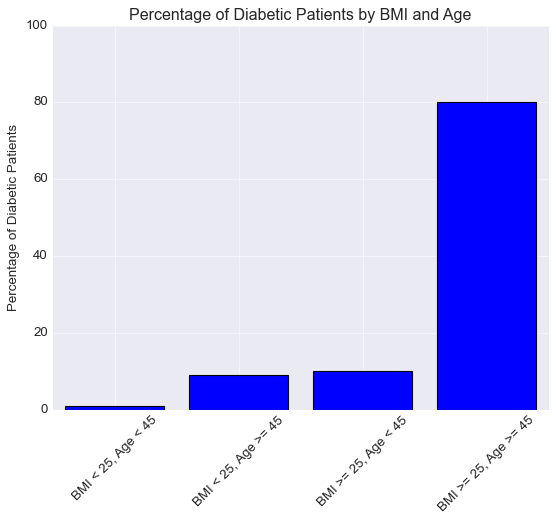

In [23]:
#Import dependancy for plotting

import matplotlib.pyplot as plt
yaxis = [x*100 for x in summary_3a["diabetes"]]
plt.style.use('seaborn-v0_8-darkgrid')
plt.bar([0,1,2,3], yaxis)
plt.xticks([0,1,2,3], ["BMI < 25, Age < 45", "BMI < 25, Age >= 45", "BMI >= 25, Age < 45", "BMI >= 25, Age >= 45"], rotation=45)
plt.ylim(0, 100)
plt.ylabel("Percentage of Diabetic Patients")
plt.title("Percentage of Diabetic Patients by BMI and Age")
plt.show()

<Axes: title={'center': 'Diabetes by Hypertension and Heart Disease'}, xlabel='Hypertension and Heart Disease', ylabel='Percentage of Diabetics'>

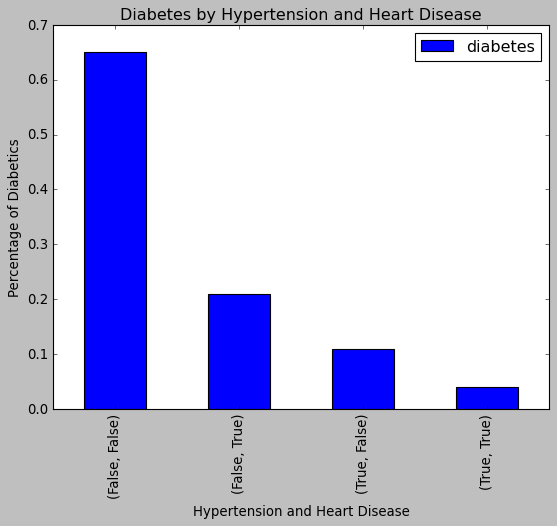

In [13]:
summary_2a.plot(kind='bar', title='Diabetes by Hypertension and Heart Disease', ylabel='Percentage of Diabetics', xlabel='Hypertension and Heart Disease')


c:\Users\Nathan\anaconda34\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Diabetes by Age and BMI'}, xlabel='age', ylabel='bmi'>

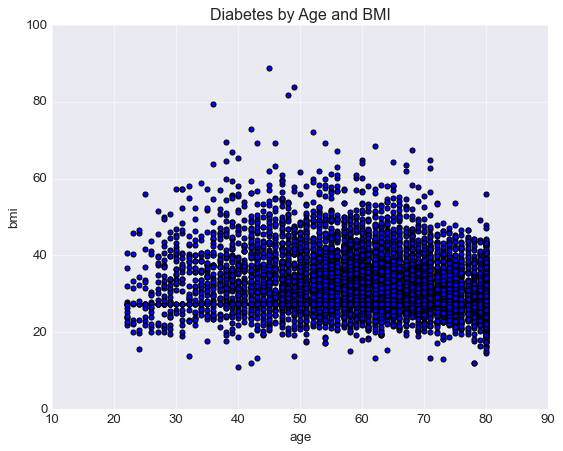

In [32]:
diabetes_df.plot.scatter(x='age', y='bmi', title= 'Diabetes by Age and BMI')

Text(0.5, 0, 'Diabetes Status')

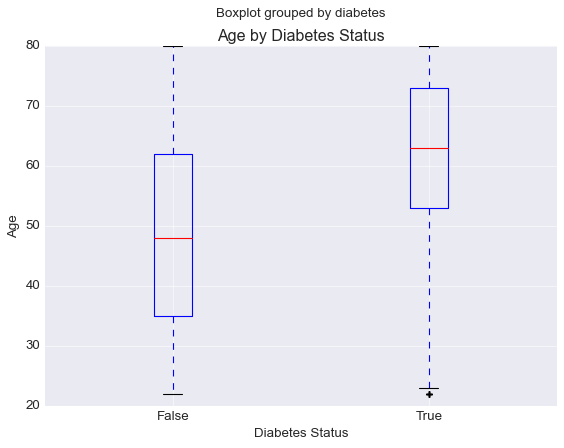

In [35]:
plot_3 = clean_df.boxplot("age", "diabetes").set_title("Age by Diabetes Status")
plt.ylabel("Age")
plt.xlabel("Diabetes Status")

Text(0.5, 0, 'Diabetes Status')

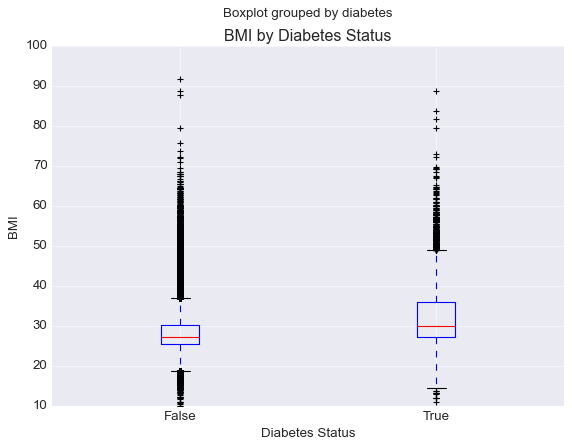

In [36]:
plot_4 = clean_df.boxplot("bmi", "diabetes").set_title("BMI by Diabetes Status")
plt.ylabel("BMI")
plt.xlabel("Diabetes Status")

Text(0.5, 0, 'Diabetes Status')

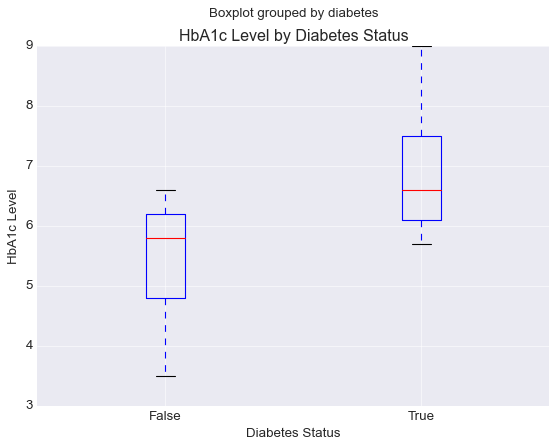

In [37]:
plot_5 = clean_df.boxplot("HbA1c_level", "diabetes").set_title("HbA1c Level by Diabetes Status")
plt.ylabel("HbA1c Level")
plt.xlabel("Diabetes Status")

Text(0.5, 0, 'Diabetes Status')

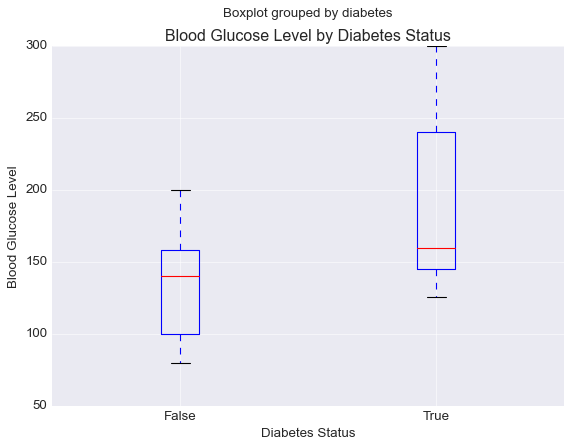

In [38]:
plot_6 = clean_df.boxplot("blood_glucose_level", "diabetes").set_title("Blood Glucose Level by Diabetes Status")
plt.ylabel("Blood Glucose Level")
plt.xlabel("Diabetes Status")